# PRICING

# Pricing Problem

A Pricing Problem consists on proposing a price to a given customer, receiving a positive outcome or a negative outcome.
we want to estimate the Demand Curve of the Customers based on the different prices that are offered to them.
Because the set of possible prices is continuos, we discretize it with integer values, choosing only five of them.
We have chosen the prices for our product as 5, 10 ,15, 20, 25 euros.

### Our Scenario

Each customer has been modeled having two different binary attributes, Age (Young, Adult) and Familiarity with the product offered (Familiar, Unfamiliar).
Our assumption is that, given the nature of the product (subscription with a streaming channel like Netflix or Disney+), the three most common classes of customers that will arrive at our site would be:
(Young, Familiar), (Young, Unfamiliar), (Adult, Familiar), called respectively "yf", "yu", "af".

### Aggregate and Disaggregate Demand Curves

in the next sections, we'll explore the distinct solutions for the problem of learning the Aggregate and Disaggregate Demand Curve, using the Thompson Sampling Multi Armed Bandit.

## Multi Armed Bandit - Thompson Sampling

We use a Thompson Sampling Algorithm to choose the price to propose to each client.
TS will learn a Beta Distributions for each price, adjusting the relative parameters $\alpha_{price}$ and $\beta_{price}$ with the outcomes of the proposed price.

### Thompson Sampling
1. At every time $t$, for every arm $a$

$θ^{˜}_{a}$ ← 𝖲𝖺𝗆𝗉𝗅𝖾 (ℙ($μ_{a}$ = $θ_{a}$)) (Beta Distribution)

2. At every $t$ play $a$ such that:

$a_{t}$ ← $argmax_{a∈A}${$θ^{˜}_{a}$ x $price_{a}$}

3. Update the Beta distribution of arm as:

$(α_{a_{t}}, β_{a_{t}}) ← (α_{a_{t}}, β_{a_{t}}) + (x_{a_{t},t}, 1 − x_{a_{t},t})$


### Regret Formula

## PART 4 - Aggregate Demand Curve 

In [1]:
from experiment_4_5 import *
#arms_candidates = [5, 10, 15, 20, 25]
n_experiments = 3
horizon = 5000 ## how many people are used to perform each experiment
pricing_env_id = 0

### Run Experiment

In [2]:
exp4 = Experiment_4_5(pricing_env_id)

In [4]:
exp4.run_experiment(n_experiments, horizon) # no week paseed -> No context generation

Performing experiment: 1
Performing experiment: 2
Performing experiment: 3


### Regret without Context Generation

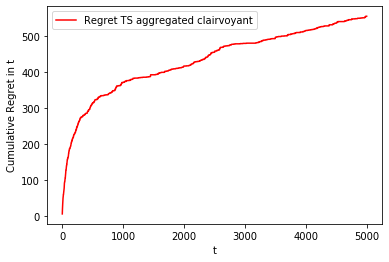

In [5]:
exp4.plot_regret_aggregated()

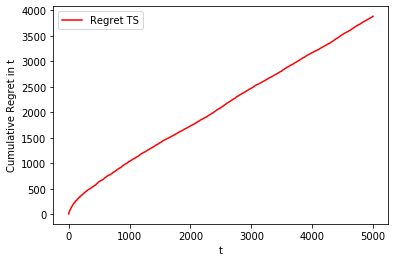

In [6]:
exp4.plot_regret()

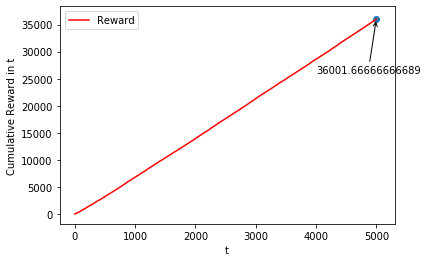

In [7]:
exp4.plot_reward()

## PART 5 - Disaggregate Demand Curve

## Context Generation

After a certain number of customers analyzed by the Learning Algorithm, the space of features is split into different contexts, if it is respected the split condition.

## Split Condition
Split if it is true for the context:

$p_{c_{1}}μ_{a^{*}_{c1},c1} + p_{c_{2}}μ_{a^{*}_{c2},c2}$ $\geq$ $μ_{a^{*}_{c0},c0}$


### Run Experiment

We now run 5 experiments with the same number of customers, doing the split at each week.

Number of customers: 5000, week = 150, number of experiments = 5

In [7]:
exp5 = Experiment_4_5(pricing_env_id)
## week says how many people arrives each week, at the end end of a week there is a context split

In [8]:
exp5.run_experiment(n_experiments, horizon, week = 1200, context_graph=True)

Performing experiment: 1


Performing experiment: 2


Performing experiment: 3


## Regret with Context Generation

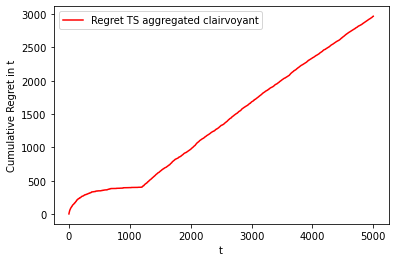

In [9]:
exp5.plot_regret_aggregated()
# valuto context generation con la regret del no context

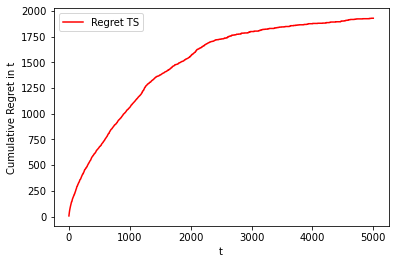

In [10]:
exp5.plot_regret()

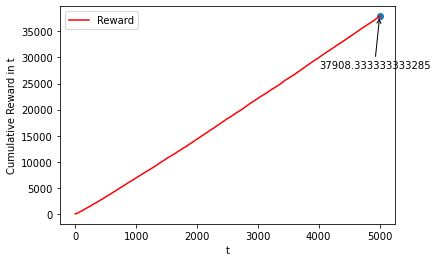

In [11]:
exp5.plot_reward()

### Results Analysis

We can clearly see that, using the Thompson Sampling combined with the Context Generation, the Regret stabilyzes quickly at a maximum, without increase. 
Indeed, the learning algorithm has learnt to offer the optimal candidates for each context. 
In some experiments it has learned to split the classes into three different context, or only two. 
This is caused by the random arrival of customers in each experiment.